In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print('Pixels are normalized.')

Pixels are normalized.


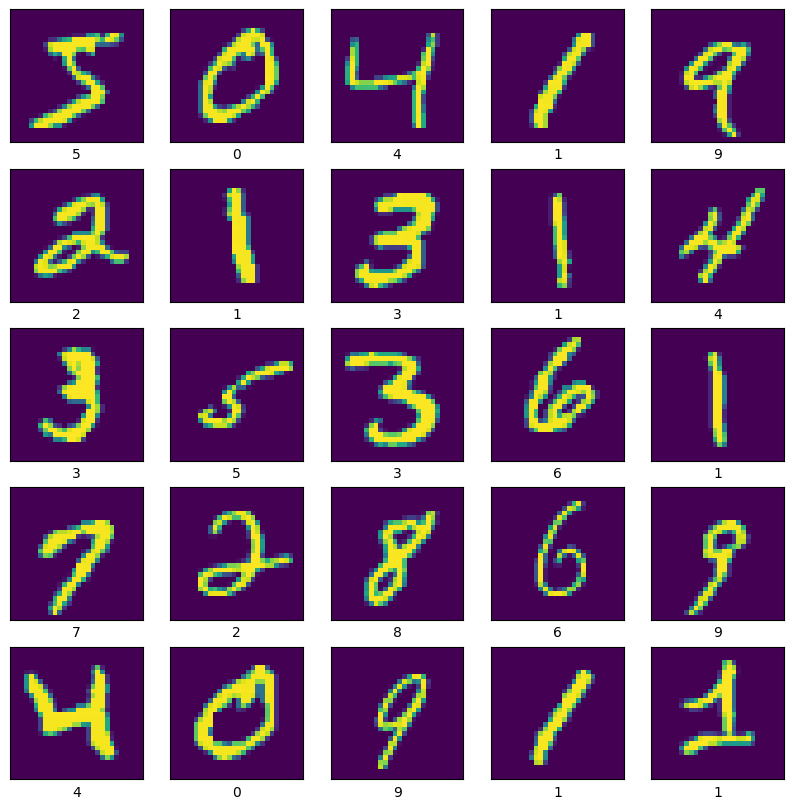

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

In [8]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28,28)),
    keras.layers.Reshape(target_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2559 - accuracy: 0.9292
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0968 - accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0729 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0618 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0538 - accuracy: 0.9837


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 12)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2028)              0         
                                                                 
 dense (Dense)               (None, 10)                20290     
                                                                 
Total params: 20410 (79.73 KB)
Trainable params: 20410 (79.73 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 942us/step - loss: 0.0564 - accuracy: 0.9817


In [12]:
def get_label_color(val1, val2):
    if val1 == val2:
        return 'black'
    else:
        return 'red'


313/313 [==============================] - 0s 847us/step


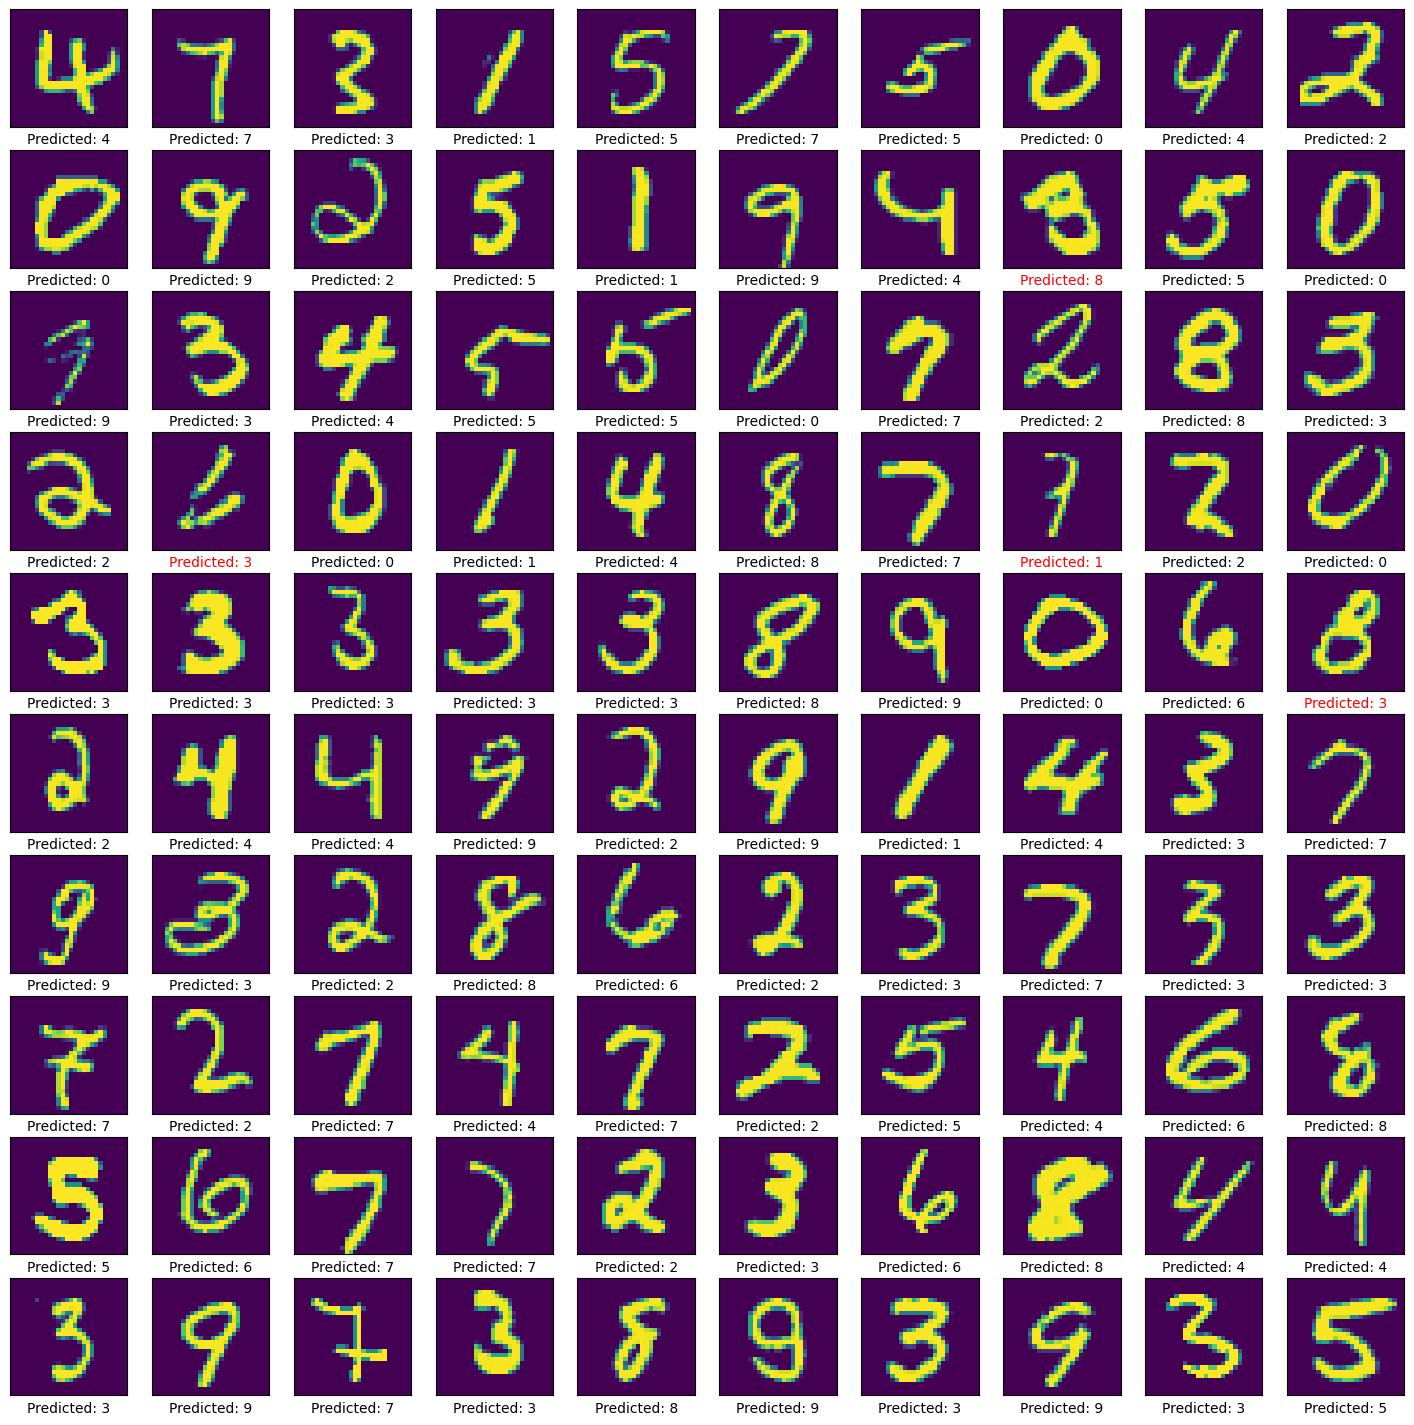

In [14]:
predictions = model.predict(test_images)

prediction_digits = np.argmax(predictions, axis=1)

plt.figure(figsize=(18, 18))
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_index = random.randint(0, len(prediction_digits))
    plt.imshow(test_images[image_index])
    ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index], test_labels[image_index]))
    plt.xlabel('Predicted: %d' % prediction_digits[image_index])

plt.show()